In [12]:
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

2024-06-03 11:06:55.439017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# prints a list of available models
StarDist2D.from_pretrained()

# creates a pretrained model (for 2D RGB images)
model = StarDist2D.from_pretrained('2D_versatile_he')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [14]:
img = test_image_nuclei_2d()

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

ValueError: axes (YXC) must be of length 2.

In [1]:
import numpy as np
from cellpose import models, utils, io
import matplotlib.pyplot as plt

In [2]:
image_path = '/Users/serenapei/ASTAR/Y90HCC/NCC040Post/outs/spatial/tissue_hires_image.png'
img = io.imread(image_path)

In [3]:
# If you have a list of images
# image_paths = ['/Users/serenapei/ASTAR/Y90HCC/NCC001Post_NCC011Post/outs/spatial/tissue_hires_image.png']
# imgs = [io.imread(image_path) for image_path in image_paths]

In [4]:
model = models.Cellpose(gpu=True, model_type='cyto')

In [5]:
masks, flows, styles = models.CellposeModel(model_type='tissuenet_cp3').eval(img,
                            diameter=25, channels=[1,2])

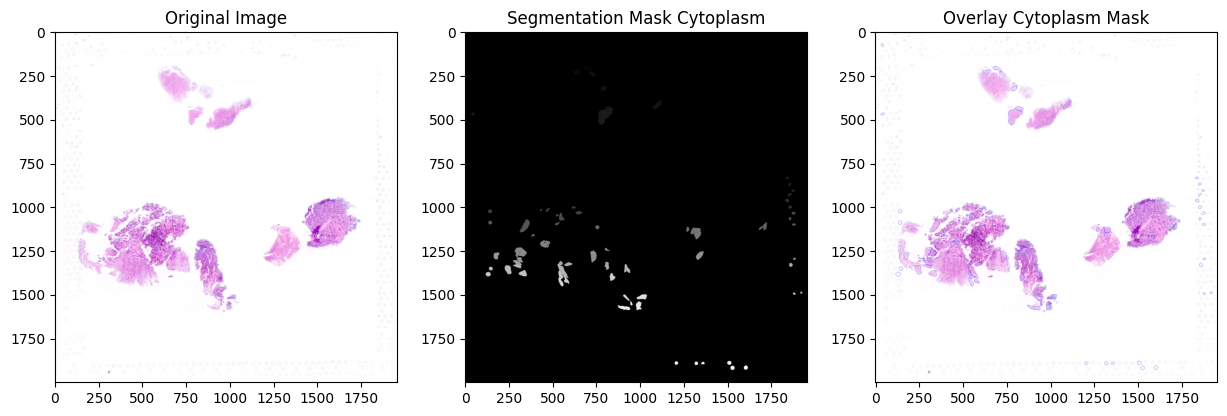

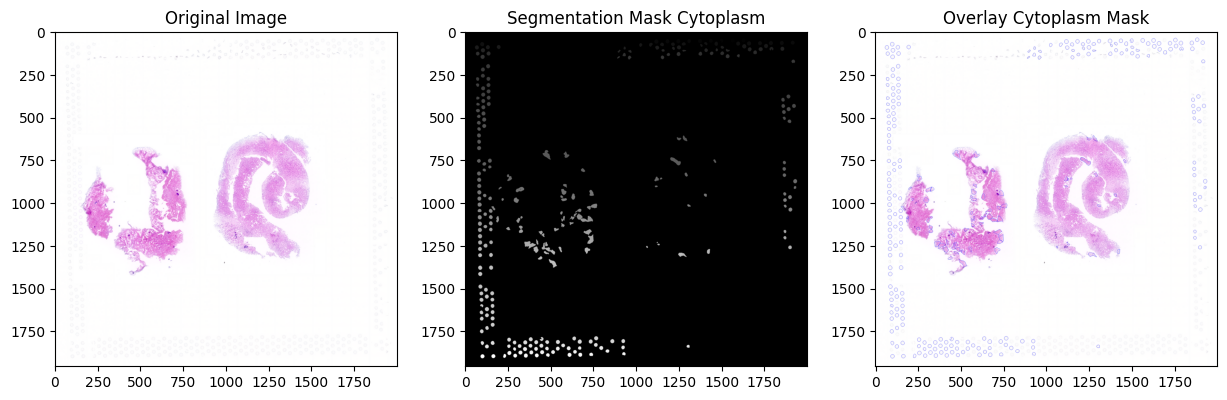

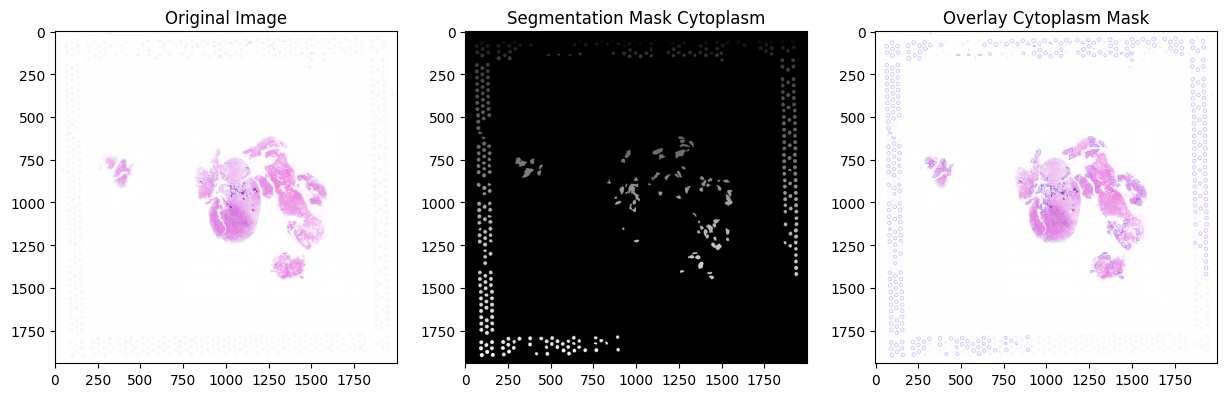

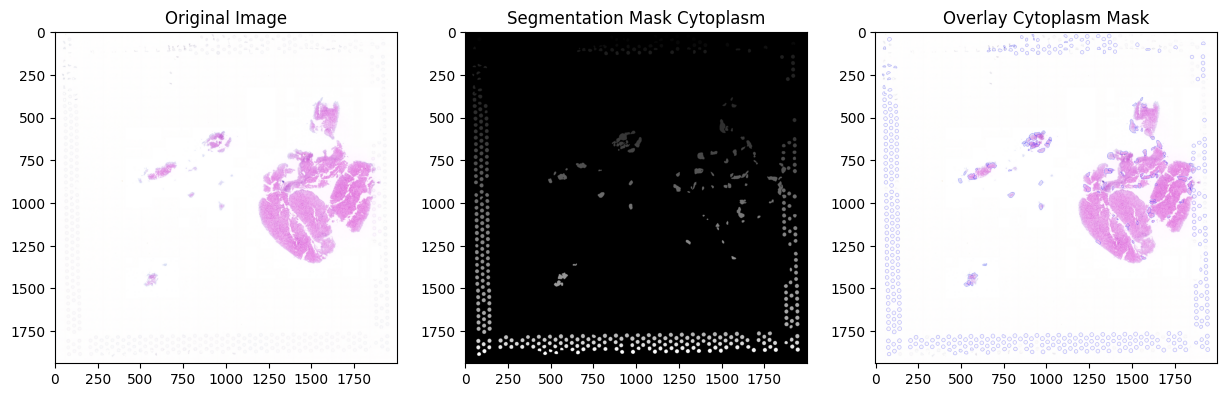

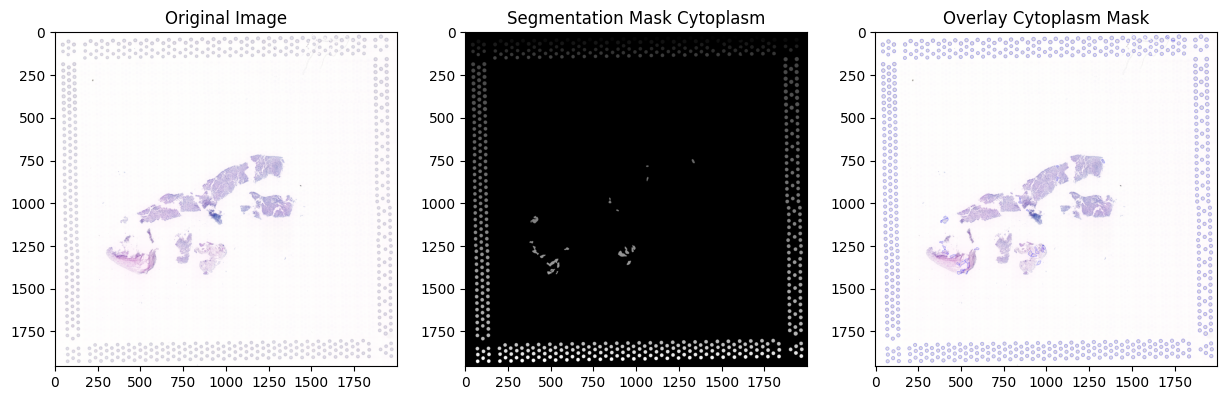

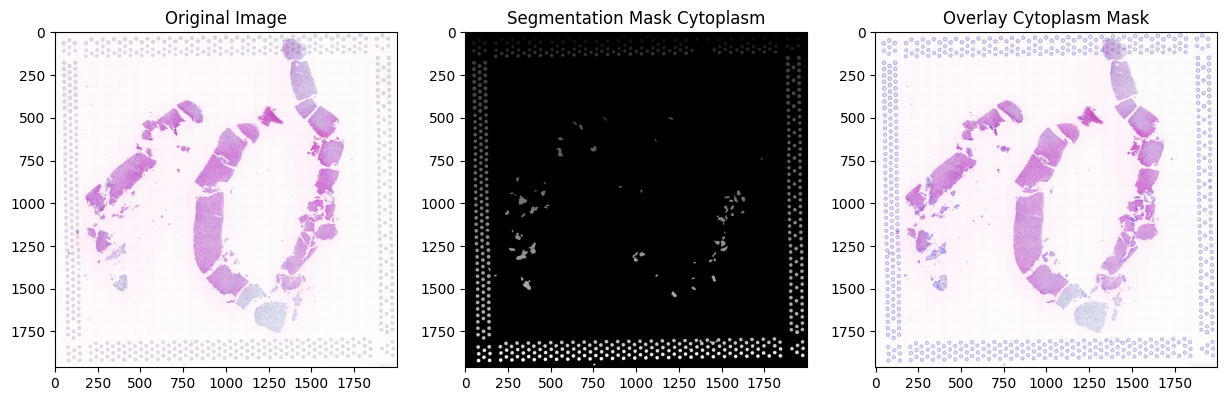

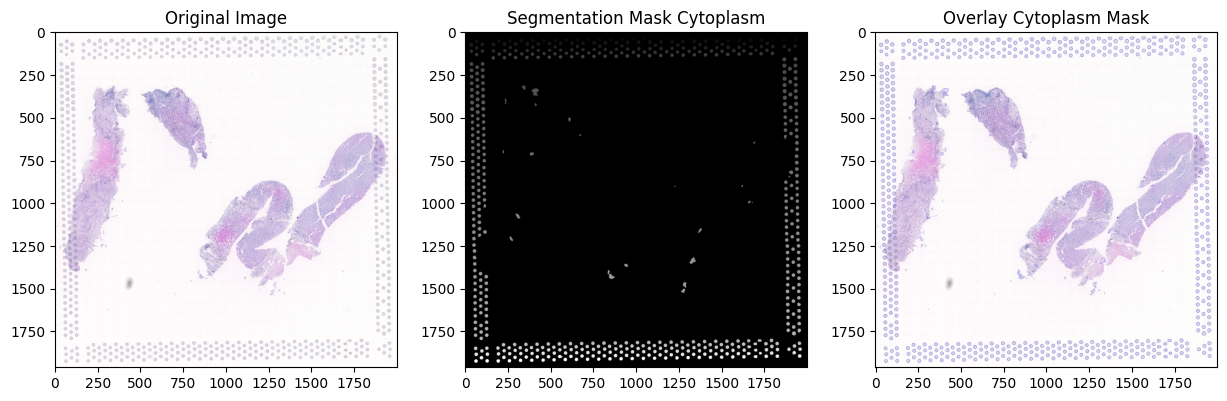

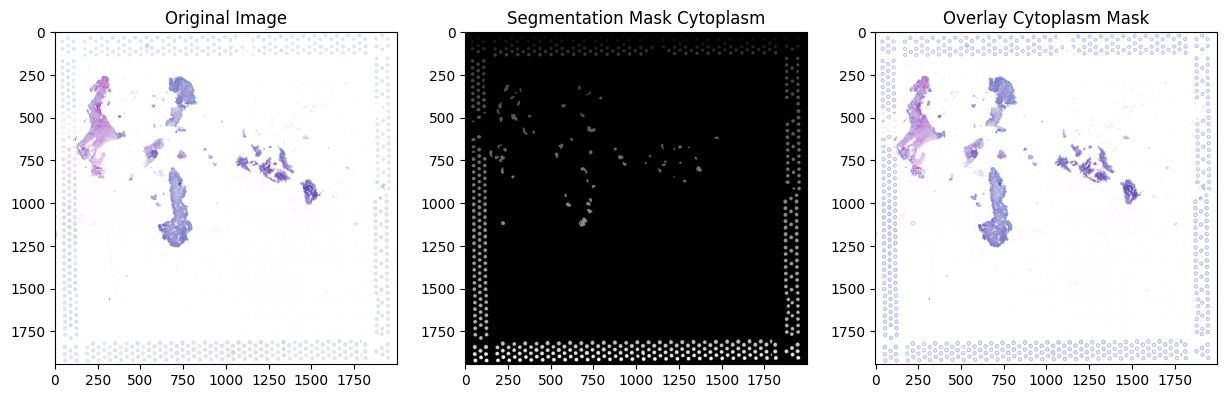

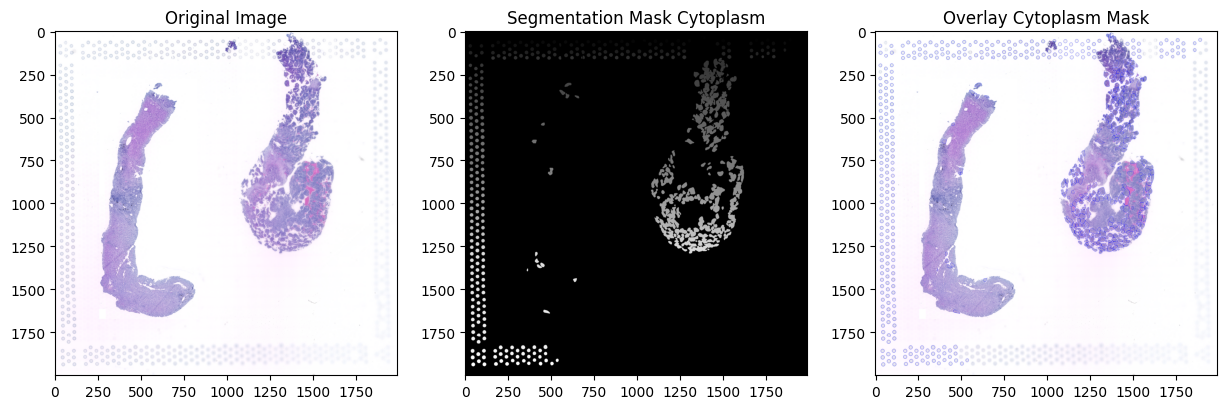

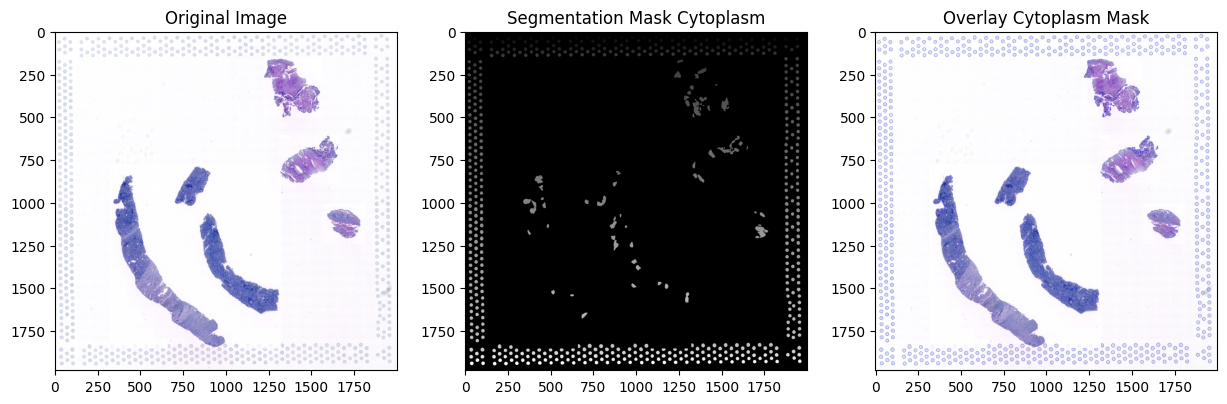

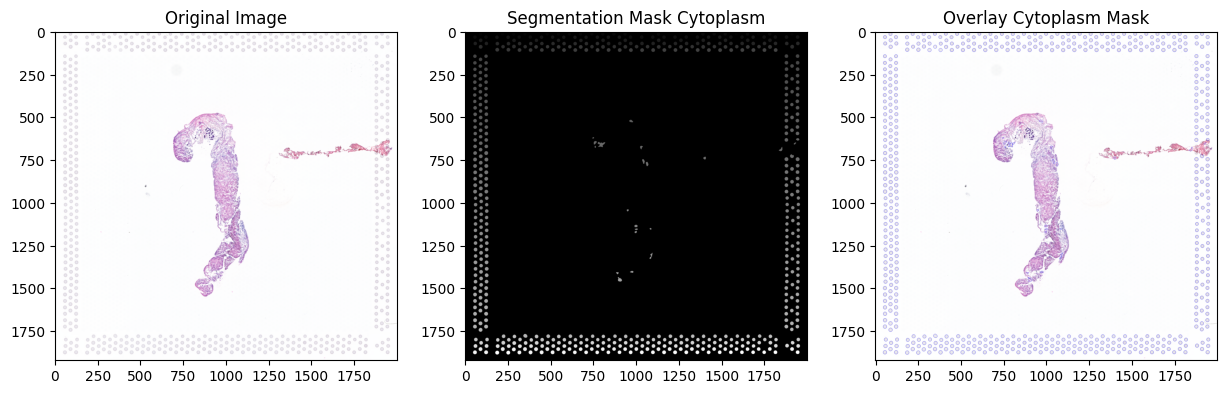

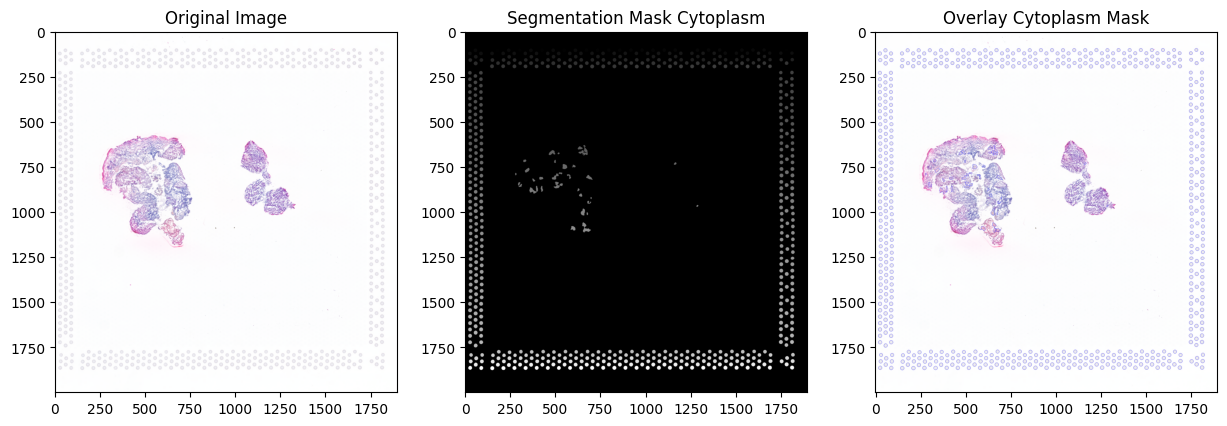

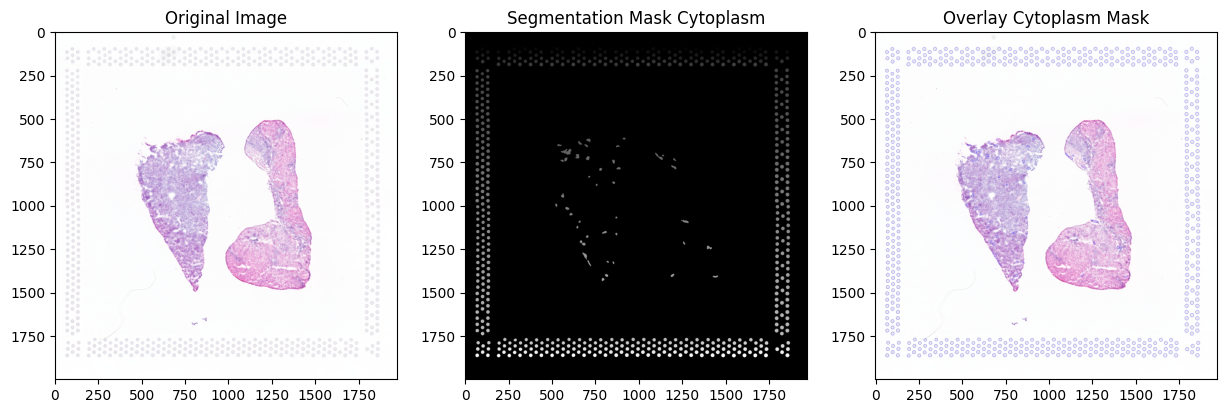

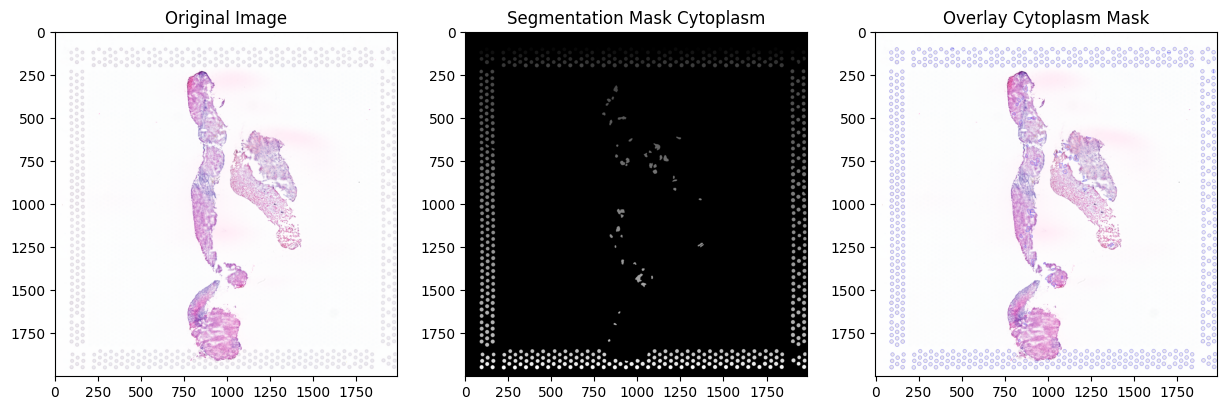

In [10]:
import numpy as np
from cellpose import models, utils, io
import matplotlib.pyplot as plt


file_map = {'NCC001Post_NCC011Post': ['HCC Y90 GEX 20211122 Frame A.czi_Tumor_(4.00,400,1360,34816,31616)-mask.png','HCC Y90 GEX 20211122 Frame A.czi_Stroma_(4.00,2976,2672,32000,30656)-mask.png'],
            'NCC012Post_NCC018Post': ['HCC Y90 GEX 20211122 Frame B.czi_Tumor_(4.00,2960,2760,24672,23656)-mask.png', 'HCC Y90 GEX 20211122 Frame B.czi_Stroma_(4.00,3088,11360,24528,14952)-mask.png'],
            'NCC015Post_NCC017Post': ['HCC Y90 GEX 20211122 Frame C.czi_Tumor_(4.00,5544,11944,23896,14616)-mask.png','HCC Y90 GEX 20211122 Frame C.czi_Stroma_(4.00,5400,2584,31264,24360)-mask.png'],
            'NCC039Post_NCC034Post': ['HCC Y90 GEX 20211122 Frame D.czi_Tumor_(4.00,328,144,34728,34720)-mask.png','HCC Y90 GEX 20211122 Frame D.czi_Stroma_(4.00,2576,1424,32360,25864)-mask.png'],
            'NCC027Post': ['HCC Y90 GEX 20221206 Frame A.czi_Tumor_(4.00,0,24,30008,35368)-mask.png','HCC Y90 GEX 20221206 Frame A.czi_Stroma_(4.00,0,0,35640,35256)-mask.png'],
            'NCC040Post': ['HCC Y90 GEX 20221206 Frame B.czi_Tumor_(4.00,960,720,34872,33784)-mask.png','HCC Y90 GEX 20221206 Frame B.czi_Stroma_(4.00,960,664,34872,33864)-mask.png'],
            'NCC037Post_NCC023Post': ['HCC Y90 GEX 20221206 Frame C.czi_Tumor_(4.00,232,976,35576,33912)-mask.png','HCC Y90 GEX 20221206 Frame C.czi_Stroma_(4.00,1144,648,34200,33888)-mask.png'],
            'NCC037Pre_NCC040A1Pre': ['HCC Y90 GEX 20221214 Frame A.czi_Tumor_(4.00,1547,3452,23802,17219)-mask.png','HCC Y90 GEX 20221214 Frame A.czi_Stroma_(4.00,1565,3470,23556,21574)-mask.png'],
            'NCC023Pre_NCC034Pre': ['HCC Y90 GEX 20221214 Frame B.czi_Tumor_(4.00,0,0,26387,22060)-mask.png','HCC Y90 GEX 20221214 Frame B.czi_Stroma_(4.00,1365,17,20361,22008)-mask.png','HCC Y90 GEX 20221214 Frame B.czi_Epithelium_(4.00,0,0,26404,22072)-mask.png'],
            'NCC027Pre_NCC040A2Pre': ['HCC Y90 GEX 20221214 Frame C.czi_Tumor_(4.00,4461,2110,18907,22037)-mask.png','HCC Y90 GEX 20221214 Frame C.czi_Stroma_(4.00,4472,375,21159,24277)-mask.png','HCC Y90 GEX 20221214 Frame C.czi_Epithelium_(4.00,4478,2122,18831,22025)-mask.png'],
            'NCC015Post_NCC012Post': ['V11N0-086_H&E_Frame B.czi_Tumor_(4.00,5504,2704,40920,41664)-mask.png','V11N0-086_H&E_Frame B.czi_Stroma_(4.00,1112,176,45360,44432)-mask.png'],
            'NCC015Pre_NCC012Pre': ['V11N0-086_H&E_Whole Slide.czi - Scene #1_Tumor_(4.00,456,104,42536,45856)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #1_Stroma_(4.00,640,0,45840,46056)-mask.png'],
            'NCC016Pre_NCC011Pre': ['V11N0-086_H&E_Whole Slide.czi - Scene #3_Tumor_(4.00,1040,336,42456,43112)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #3_Stroma_(4.00,1064,352,46432,44448)-mask.png'],
            'NCC016Post_NCC011Post': ['V11N0-086_H&E_Whole Slide.czi - Scene #4_Tumor_(4.00,1360,560,44960,45352)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #4_Stroma_(4.00,0,2352,46480,44480)-mask.png']}

for sample in file_map.keys():
    # Load the image
    image_path = '/Users/serenapei/ASTAR/Y90HCC/' + sample + '/outs/spatial/tissue_hires_image.png'  # Replace with your image path
    img = io.imread(image_path)

    # Initialize the Cellpose model
    model_cyto = models.Cellpose(gpu=False, model_type='cyto')  # Use 'cyto' for cytoplasm, 'nuclei' for nuclei
    # model_nuclei = models.Cellpose(gpu=False, model_type='nuclei')  # Use 'cyto' for cytoplasm, 'nuclei' for nuclei

    # Run segmentation on the image
    masks, flows, styles, diams = model_cyto.eval(img, diameter=None, channels=[0, 0])
    # masks2, flows2, styles2, diams2 = model_nuclei.eval(img, diameter=None, channels=[0, 0])

    # Visualize the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')

    # Segmentation mask
    ax[1].imshow(masks, cmap='gray')
    ax[1].set_title('Segmentation Mask Cytoplasm')

    # Overlay of original image and mask
    outlines = utils.masks_to_outlines(masks)
    # Overlay the outlines on the original image
    overlayed_image = img.copy()
    overlayed_image[outlines] = [0, 0, 255]  # Outline color (blue)
    ax[2].imshow(overlayed_image)
    ax[2].set_title('Overlay Cytoplasm Mask')
    # overlay = plot.outline_view(img, outlines)
    # ax[3].imshow(overlay)
    # ax[3].set_title('Overlay Cytoplasm Mask')

    # outlines = utils.masks_to_outlines(masks2)
    # # Overlay the outlines on the original image
    # overlayed_image2 = img.copy()
    # overlayed_image2[outlines] = [0, 0, 255]  # Outline color (blue)
    # ax[4].imshow(overlayed_image1)
    # outlines = utils.masks_to_outlines(masks2)
    # overlay = plot.outline_view(img, outlines)
    # ax[4].imshow(overlay)
    # ax[4].set_title('Overlay Nuclei Mask')

    # output_path = '/Users/serenapei/ASTAR/Y90HCC/' + sample + '/outs/spatial/' + 'segmented_plot.png'
    # plt.savefig(output_path, bbox_inches="tight", pad_inches=0.1)
    plt.show()

    # Save the mask to a file if needed
    # io.imsave('/Users/serenapei/ASTAR/Y90HCC/' + sample + '/outs/spatial/segmentation_masks_cyto.png', masks.astype(np.uint16))  # Save as 16-bit PNG
    # io.imsave('/Users/serenapei/ASTAR/Y90HCC/' + sample + '/outs/spatial/segmentation_masks_nuclei.png', masks2.astype(np.uint16))  # Save as 16-bit PNG


In [ ]:
# from cellpose import models
# import cv2
# import matplotlib.pyplot as plt

# # Load the image
# image_path = '/Users/serenapei/ASTAR/Y90HCC/' + sample + '/outs/spatial/tissue_hires_image.png'
# image = cv2.imread(image_path)

# # Initialize the model (use gpu=False if you don't have a GPU)
# model = models.Cellpose(gpu=True,model_type='cyto3')

# # Segment the cells
# masks, flows, styles, diams = model.eval(image, diameter=30, channels=[0, 0])

# # Plot the results
# fig = plt.figure(figsize=(12, 5))

# ax1 = fig.add_subplot(1, 3, 1)
# ax1.imshow(image)
# ax1.set_title('Original Image')
# ax1.axis('off')

# ax2 = fig.add_subplot(1, 3, 2)
# ax2.imshow(flows)
# ax2.set_title('Cell Segmentation')
# ax2.axis('off')

# ax3 = fig.add_subplot(1, 3, 3)
# ax3.imshow(masks)
# ax3.set_title('Masks')
# ax3.axis('off')

# plt.show()

In [1]:
# U-Net
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model

def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # Decoder
    up6 = Conv2DTranspose(512, 2, strides=(2, 2), activation='relu', padding='same', kernel_initializer='he_normal')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    
    up7 = Conv2DTranspose(256, 2, strides=(2, 2), activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    
    up8 = Conv2DTranspose(128, 2, strides=(2, 2), activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    
    up9 = Conv2DTranspose(64, 2, strides=(2, 2), activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    
    outputs = Conv2D(1, 1, activation='sigmoid')(conv9)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Example usage:
# model = unet(input_size=(256, 256, 3))
# model.summary()


2024-06-04 16:26:20.559030: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = unet(input_size=(256, 256, 3))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_9[0][0]  

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# vcells-MM
import cv2
import numpy as np
from skimage import color
from skimage.filters import threshold_otsu
from skimage.segmentation import watershed
from skimage.measure import label, regionprops
from sklearn.cluster import KMeans

# Load image
def load_image(image_path):
    return cv2.imread(image_path)

# Preprocessing - Remove uninformative background areas
def preprocess(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Perform thresholding to segment background
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the binary image to get background mask
    binary = cv2.bitwise_not(binary)
    # Apply morphological operations to remove small objects/noise
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    # Apply the mask to original image
    result = cv2.bitwise_and(image, image, mask=opening)
    return result

# Color Deconvolution
def color_deconvolution(image):
    # Convert image to float
    image = image.astype(np.float64) / 255.0
    # Define stain matrix for H&E
    hematoxylin = np.array([[0.650, 0.704, 0.286],
                             [0.072, 0.990, 0.105],
                             [0.268, 0.570, 0.776]])
    # Perform color deconvolution
    deconvoluted = color.separate_stains(image, hematoxylin)
    return deconvoluted

# Generation of Tissue Mask
def generate_tissue_mask(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Perform Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Perform morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    # Perform distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    # Find unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)
    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0
    # Apply watershed algorithm
    markers = cv2.watershed(image, markers)
    return markers

# Extraction of Nuclear Markers
def extract_nuclear_markers(hematoxylin_channel):
    # Find regional minima
    markers = cv2.threshold(hematoxylin_channel, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return markers

# Partitioning of Tissue Mask into V-Cells
def partition_tissue_mask(tissue_mask):
    return watershed(-tissue_mask, markers, mask=image)

# Feature Extraction and Selection
def extract_features(v_cells):
    # Extract features using regionprops
    features = []
    for region in regionprops(v_cells):
        features.append([region.area, region.perimeter, region.eccentricity])
    return np.array(features)

# Consensus Clustering
def consensus_clustering(features):
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels

# Ensemble Generation
def generate_ensemble(cluster_labels):
    # Dummy implementation, return cluster labels
    return [cluster_labels]

# Ensemble Selection
def select_ensemble(ensemble):
    # Dummy implementation, return all ensemble solutions
    return ensemble

# Consensus Function
def consensus(ensemble):
    # Dummy implementation, return majority voting
    consensus_result = np.zeros_like(ensemble[0])
    for solution in ensemble:
        consensus_result += solution
    consensus_result = np.round(consensus_result / len(ensemble)).astype(np.uint8)
    return consensus_result

# Main function
if __name__ == "__main__":
    # Load image
    image_path = 'path/to/image'
    image = load_image(image_path)

    # Preprocessing
    preprocessed_image = preprocess(image)

    # Color Deconvolution
    deconvoluted_image = color_deconvolution(preprocessed_image)

    # Generation of Tissue Mask
    tissue_mask = generate_tissue_mask(preprocessed_image)

    # Extraction of Nuclear Markers
    nuclear_markers = extract_nuclear_markers(deconvoluted_image[..., 0])

    # Partitioning of Tissue Mask into V-Cells
    v_cells = partition_tissue_mask(tissue_mask)

    # Feature Extraction and Selection
    features = extract_features(v_cells)

    # Consensus Clustering
    cluster_labels = consensus_clustering(features)

    # Ensemble Generation
    ensemble = generate_ensemble(cluster_labels)

    # Ensemble Selection
    selected_ensemble = select_ensemble(ensemble)

    # Consensus Function
    consensus_result = consensus(selected_ensemble)

    # Display or save the result
    cv2.imshow("Result", consensus_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



In [ ]:
# Self-learn clustering
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, AveragePooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# Define CNN architecture
def create_cnn(input_shape=(224, 224, 1)):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        
        # Convolutional layers
        Conv2D(32, (11, 11), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        Conv2D(32, (5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        Conv2D(32, (5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        Conv2D(32, (5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        Conv2D(32, (5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        Conv2D(32, (5, 5), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        AveragePooling2D(),
        
        # Fully connected layer
        Flatten(),
        Dense(128, activation='relu'),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define hyperparameters
learning_rate = 1e-4
batch_size = 32
epochs = 100

# Load your dataset and preprocess as needed
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CNN model
model = create_cnn(input_shape=(224, 224, 1))

# Compile the model
optimizer = SGD(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from scipy.spatial import Voronoi, Delaunay
import networkx as nx
import czifile
from scipy.spatial import Voronoi
from shapely.geometry import Polygon
import cv2
import networkx as nx
from networkx.algorithms import community
from sklearn.cluster import KMeans

# Function to perform tissue object detection and feature extraction
def detect_and_extract_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform thresholding to segment tissue objects
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours of tissue objects
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract features from each tissue object (e.g., centroid coordinates, area, perimeter)
    features = []
    for contour in contours:
        # Compute centroid coordinates
        M = cv2.moments(contour)
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
        
        # Compute area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Add features to the list
        features.append([centroid_x, centroid_y, area, perimeter])
    
    return features

# Example usage:
# image = cv2.imread('image.jpg')
# features = detect_and_extract_features(image)

# Step 1: Tissue Object Clustering
def cluster_tissue_objects(image_file):
    # Perform tissue object detection and feature extraction
    image = cv2.imread(image_file)
    features = detect_and_extract_features(image)
    # Apply Mean Shift clustering
    ms = MeanShift()
    clusters = ms.fit_predict(features)  # Adjust features according to your data
    print('clusters: ', clusters)
    return clusters

# Function to assign pixels to Voronoi regions and merge adjacent polygons
def assign_and_merge_voronoi_pixels(image_shape, vor):
    # Initialize an array to store the merged regions
    merged_regions = []
    
    # Iterate over each Voronoi region
    for region_index, region_vertices in enumerate(vor.regions):
        if not region_vertices or -1 in region_vertices:
            # Skip if the region is empty or unbounded
            continue
        
        # Extract the vertices of the current region
        polygon_vertices = [vor.vertices[vertex_index] for vertex_index in region_vertices]
        
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        
        # Convert the polygon to a binary mask
        polygon_mask = polygon.buffer(0).contains
    
        # Assign pixels to the current Voronoi region based on proximity to its vertices
        region_pixels = np.zeros(image_shape, dtype=bool)
        min_x, min_y, max_x, max_y = polygon.bounds
        min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
        for x in range(min_x, max_x):
            for y in range(min_y, max_y):
                if polygon_mask(x, y):
                    region_pixels[y, x] = True  # Note: Swap x and y due to the image coordinates
                
        # Add the current region to the list of merged regions
        merged_regions.append(region_pixels)
    
    return merged_regions

# Example usage:
# vor = Voronoi(cluster_centers)
# merged_regions = assign_and_merge_voronoi_pixels(image.shape[:2], vor)

# Step 2: Voronoi Representation
def generate_voronoi(image, cluster_centers):
    # Compute Voronoi diagram
    vor = Voronoi(cluster_centers)
    # Assign pixels to Voronoi regions
    # Merge adjacent polygons
    # Return merged regions
    merged_regions = assign_and_merge_voronoi_pixels(image.shape[:2], vor)
    return merged_regions

# Example usage:
# segmented_image = graph_cut_partition(image, merged_regions, cluster_centers)

# Step 3: Graph Cut Partition
def graph_cut_partition(image, merged_regions, cluster_centers):
    # Construct region adjacency graph
    rag = nx.Graph()
    # Add nodes for merged regions
    rag.add_nodes_from(merged_regions)
    # Construct edges using Delaunay triangulation
    tri = Delaunay(cluster_centers)
    # Add edges to the graph
    for simplex in tri.simplices:
        rag.add_edge(simplex[0], simplex[1])
        rag.add_edge(simplex[1], simplex[2])
        rag.add_edge(simplex[2], simplex[0])
   # Perform graph cut partitioning
    partition = community.kernighan_lin_bisection(rag)

    # Combine the regions based on the partition
    segmented_image = np.zeros_like(image)
    for idx, region in enumerate(partition[0]):
        segmented_image += rag.nodes[region]['pixels'] * (idx + 1)

    return segmented_image

# Function to initialize cluster centers using K-means++ initialization
def initialize_cluster_centers(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    flattened_data = np.reshape(data, (data.shape[0], -1))
    kmeans.fit(flattened_data.T)
    cluster_centers = kmeans.cluster_centers_
    return cluster_centers

# Main function
def main(czi_path):
    # Load CZI image
    with czifile.CziFile(czi_path) as czi:
        image = czi.asarray()

    # Preprocessing (e.g., resizing, normalization, color space conversion)
    # image = preprocess(image)

    print(image.shape)
    # initialize cluster centers
    cluster_centers = initialize_cluster_centers(image, 10)
    # Step 1: Tissue Object Clustering
    clusters = cluster_tissue_objects(image)

    # Step 2: Voronoi Representation
    merged_regions = generate_voronoi(clusters, cluster_centers)

    # Step 3: Graph Cut Partition
    segmented_image = graph_cut_partition(image, merged_regions, cluster_centers)

    return segmented_image

# Example usage:
segmented_image = main('/Users/serenapei/ASTAR/czi_files/HCC Y90 GEX 20211122 Frame A.czi')


(1, 1, 35235, 36126, 3)


: 

In [1]:
from sklearn.cluster import KMeans

In [1]:
# TisCut
import numpy as np
from sklearn.cluster import MeanShift
from scipy.spatial import Voronoi, Delaunay
import networkx as nx
from networkx.algorithms import community
import czifile
from shapely.geometry import Polygon
import cv2
from sklearn.cluster import KMeans
import igraph as ig


# Function to perform tissue object detection and feature extraction
def detect_and_extract_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform thresholding to segment tissue objects
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours of tissue objects
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract features from each tissue object (e.g., centroid coordinates, area, perimeter)
    features = []
    for contour in contours:
        # Compute centroid coordinates
        M = cv2.moments(contour)
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
        
        # Compute area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Add features to the list
        features.append([centroid_x, centroid_y, area, perimeter])
    
    return features

# Function to initialize cluster centers using K-means++ initialization
def initialize_cluster_centers(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    flattened_data = np.reshape(data, (-1, data.shape[-1]))
    kmeans.fit(flattened_data)
    cluster_centers = kmeans.cluster_centers_
    return cluster_centers

# Step 1: Tissue Object Clustering
def cluster_tissue_objects(image):
    # Perform tissue object detection and feature extraction
    features = detect_and_extract_features(image)
    
    # Apply Mean Shift clustering
    ms = MeanShift()
    clusters = ms.fit_predict(features)  # Adjust features according to your data
    print('clusters: ', clusters)
    return clusters

# Function to assign pixels to Voronoi regions and merge adjacent polygons
def assign_and_merge_voronoi_pixels(image_shape, vor):
    # Initialize an array to store the merged regions
    merged_regions = []
    
    # Iterate over each Voronoi region
    for region_index, region_vertices in enumerate(vor.regions):
        if not region_vertices or -1 in region_vertices:
            # Skip if the region is empty or unbounded
            continue
        
        # Extract the vertices of the current region
        polygon_vertices = [vor.vertices[vertex_index] for vertex_index in region_vertices]
        
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        
        # Convert the polygon to a binary mask
        polygon_mask = polygon.buffer(0).contains
        
        # Initialize region pixels
        region_pixels = np.zeros(image_shape[:2], dtype=bool)
        
        # Assign pixels to the current Voronoi region based on proximity to its vertices
        min_x, min_y, max_x, max_y = polygon.bounds
        min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
        for x in range(min_x, max_x):
            for y in range(min_y, max_y):
                if polygon_mask(x, y):
                    region_pixels[y, x] = True  # Note: Swap x and y due to the image coordinates
        
        # Add the current region to the list of merged regions
        merged_regions.append(region_pixels)
    
    return merged_regions

# Step 2: Voronoi Representation
def generate_voronoi(clusters, cluster_centers, image_shape):
    # Compute Voronoi diagram
    vor = Voronoi(cluster_centers)
    # Assign pixels to Voronoi regions
    merged_regions = assign_and_merge_voronoi_pixels(image_shape, vor)
    return merged_regions

# Step 3: Graph Cut Partition
def graph_cut_partition(image, merged_regions, cluster_centers):
    # Construct region adjacency graph
    rag = nx.Graph()
    # Add nodes for merged regions
    for idx, region in enumerate(merged_regions):
        rag.add_node(idx, pixels=np.asarray(region, dtype=np.uint8))

    # Construct edges using Delaunay triangulation
    tri = Delaunay(cluster_centers)
    # Add edges to the graph
    for simplex in tri.simplices:
        rag.add_edge(simplex[0], simplex[1])
        rag.add_edge(simplex[1], simplex[2])
        rag.add_edge(simplex[0], simplex[2])
    
    fig, ax = plt.subplots()
    layout = rag.layout_auto()
    ig.plot(
        rag,
        layout=layout,
        target=ax,
        vertex_size=4,
        vertex_color="lightblue",
        edge_width=0.8
    )
    plt.show()
    


In [45]:
def main(czi_path):
    # Load CZI image
    with czifile.CziFile(czi_path) as czi:
        image = czi.asarray()

    # Preprocessing (e.g., resizing, normalization, color space conversion)
    # image = preprocess(image)

    print(image.shape)
    # initialize cluster centers
    cluster_centers = initialize_cluster_centers(image, 10)
    # # Step 1: Tissue Object Clustering
    # clusters = cluster_tissue_objects(image)

    # # Step 2: Voronoi Representation
    # merged_regions = generate_voronoi(clusters, cluster_centers)

    # # Step 3: Graph Cut Partition
    # segmented_image = graph_cut_partition(image, merged_regions, cluster_centers)

    # return segmented_image


segmented_image = main('/Users/serenapei/ASTAR/czi_files/HCC Y90 GEX 20211122 Frame A.czi')

(1, 1, 35235, 36126, 3)


In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from scipy.spatial import Voronoi, Delaunay
import networkx as nx
import cv2
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import igraph as ig
from sympy import Point


# Function to perform tissue object detection and feature extraction
def detect_and_extract_features(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform thresholding to segment tissue objects
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours of tissue objects
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract features from each tissue object (e.g., centroid coordinates, area, perimeter)
    features = []
    for contour in contours:
        # Compute centroid coordinates
        M = cv2.moments(contour)
        if M["m00"] == 0:
            continue  # skip if contour is too small
        centroid_x = int(M["m10"] / M["m00"])
        centroid_y = int(M["m01"] / M["m00"])
        
        # Compute area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Add features to the list
        features.append([centroid_x, centroid_y, area, perimeter])
    
    return features

# Function to initialize cluster centers using K-means++ initialization
def initialize_cluster_centers(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(data)
    cluster_centers = kmeans.cluster_centers_
    return cluster_centers

# Step 1: Tissue Object Clustering
def cluster_tissue_objects(image):
    # Perform tissue object detection and feature extraction
    features = detect_and_extract_features(image)
    features = np.array(features)
    
    # Apply Mean Shift clustering
    ms = MeanShift()
    clusters = ms.fit_predict(features)
    return features, clusters

# Function to assign pixels to Voronoi regions and merge adjacent polygons
def assign_and_merge_voronoi_pixels(image_shape, vor):
    # Initialize an array to store the merged regions
    merged_regions = []
    
    # Iterate over each Voronoi region
    for region_index, region_vertices in enumerate(vor.regions):
        if not region_vertices or -1 in region_vertices:
            # Skip if the region is empty or unbounded
            continue
        
        # Extract the vertices of the current region
        polygon_vertices = [vor.vertices[vertex_index] for vertex_index in region_vertices]
        
        # Create a Shapely Polygon from the vertices
        polygon = Polygon(polygon_vertices)
        
        # Initialize region pixels
        region_pixels = np.zeros(image_shape[:2], dtype=bool)
        
        # Assign pixels to the current Voronoi region based on proximity to its vertices
        min_x, min_y, max_x, max_y = polygon.bounds
        min_x, min_y, max_x, max_y = int(min_x), int(min_y), int(max_x), int(max_y)
        for x in range(min_x, max_x):
            for y in range(min_y, max_y):
                if polygon.contains(Point(x, y)):
                    region_pixels[y, x] = True  # Note: Swap x and y due to the image coordinates
        
        # Add the current region to the list of merged regions
        merged_regions.append(region_pixels)
    
    return merged_regions

# Step 2: Voronoi Representation
def generate_voronoi(features, clusters, image_shape):
    unique_clusters = np.unique(clusters)
    cluster_centers = np.array([features[clusters == uc].mean(axis=0)[:2] for uc in unique_clusters])
    
    # Compute Voronoi diagram
    vor = Voronoi(cluster_centers)
    # Assign pixels to Voronoi regions
    merged_regions = assign_and_merge_voronoi_pixels(image_shape, vor)
    return merged_regions

# Step 3: Graph Cut Partition
def graph_cut_partition(image, merged_regions, cluster_centers):
    # Construct region adjacency graph
    rag = nx.Graph()
    # Add nodes for merged regions
    for idx, region in enumerate(merged_regions):
        rag.add_node(idx, pixels=np.asarray(region, dtype=np.uint8))

    # Construct edges using Delaunay triangulation
    tri = Delaunay(cluster_centers)
    # Add edges to the graph
    for simplex in tri.simplices:
        rag.add_edge(simplex[0], simplex[1])
        rag.add_edge(simplex[1], simplex[2])
        rag.add_edge(simplex[0], simplex[2])
    
    fig, ax = plt.subplots()
    layout = rag.layout_auto()
    ig.plot(
        rag,
        layout=layout,
        target=ax,
        vertex_size=4,
        vertex_color="lightblue",
        edge_width=0.8
    )
    plt.show()


# Example Usage:
# image = cv2.imread('path_to_your_image.jpg')
# features, clusters = cluster_tissue_objects(image)
# merged_regions = generate_voronoi(features, clusters, image.shape)
# graph_cut_partition(image, merged_regions, features)


In [1]:
#U-Net

import torch
import torch.nn as nn
import torch.nn.functional as F


class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)
    
    
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = (DoubleConv(n_channels, 64))
        self.down1 = (Down(64, 128))
        self.down2 = (Down(128, 256))
        self.down3 = (Down(256, 512))
        factor = 2 if bilinear else 1
        self.down4 = (Down(512, 1024 // factor))
        self.up1 = (Up(1024, 512 // factor, bilinear))
        self.up2 = (Up(512, 256 // factor, bilinear))
        self.up3 = (Up(256, 128 // factor, bilinear))
        self.up4 = (Up(128, 64, bilinear))
        self.outc = (OutConv(64, n_classes))

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits

    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)

In [42]:
from torch import device
from PIL import Image
from numpy import asarray
 
# load the image and convert into
# numpy array
img = Image.open('/Users/serenapei/ASTAR/Y90HCC/NCC015Post_NCC012Post/outs/spatial/tissue_hires_image.png')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img).T

img = torch.from_numpy(numpydata)
img = img.unsqueeze(0)
# img = img.to(device=device, dtype=torch.float32)
img = img.to(dtype=torch.float32)

unet = UNet(3,2)

with torch.no_grad():
    # output = unet(img).cpu()
    output = unet.forward(img)
    print(output)
    output = torch.nn.functional.normalize(output)
    # output = F.interpolate(output, (img.size[1], img.size[0]), mode='bilinear')
    if unet.n_classes > 1:
        mask = output.argmax(dim=1)
    else:
        mask = torch.sigmoid(output) > torch.mean(output)

# mask[0].long().squeeze().numpy()
print(mask)

tensor([[[[ 3.2572, -1.5845, -0.6208,  ..., -1.5916, -1.5971, -3.0635],
          [ 0.6022, -8.2794, -8.6900,  ..., -2.7330, -2.9029, -4.5458],
          [ 1.3271, -6.9506, -4.3890,  ...,  0.2823, -2.0914, -1.4155],
          ...,
          [ 2.1709, -2.8605, -4.8744,  ..., -2.2933, -3.2219, -4.1477],
          [ 2.0906, -0.6034, -8.6809,  ..., -2.1686, -0.1547, -2.4078],
          [ 0.2130, -0.5745, -5.4811,  ..., -0.1437,  0.1340, -2.5829]],

         [[-5.0237, -6.1692, -5.9823,  ..., -3.5059, -3.9321, -0.8081],
          [-6.0109, -4.3488, -4.3910,  ..., -7.5939, -4.6177, -2.2821],
          [-3.1290, -3.9642, -1.4613,  ..., -3.5118, -6.4107, -5.1822],
          ...,
          [-2.9650, -3.1600,  1.4088,  ..., -0.7878, -2.6948, -2.5301],
          [-1.8508, -2.4743,  1.3339,  ..., -0.0846, -2.9765, -5.2570],
          [-2.5636, -4.0450, -2.1232,  ..., -4.0990, -6.3736, -3.4841]]]])
tensor([[[0, 0, 0,  ..., 0, 0, 1],
         [0, 1, 1,  ..., 0, 0, 1],
         [0, 1, 1,  ..., 0, 0, 

(2000, 1921)
(1, 2000, 1921)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


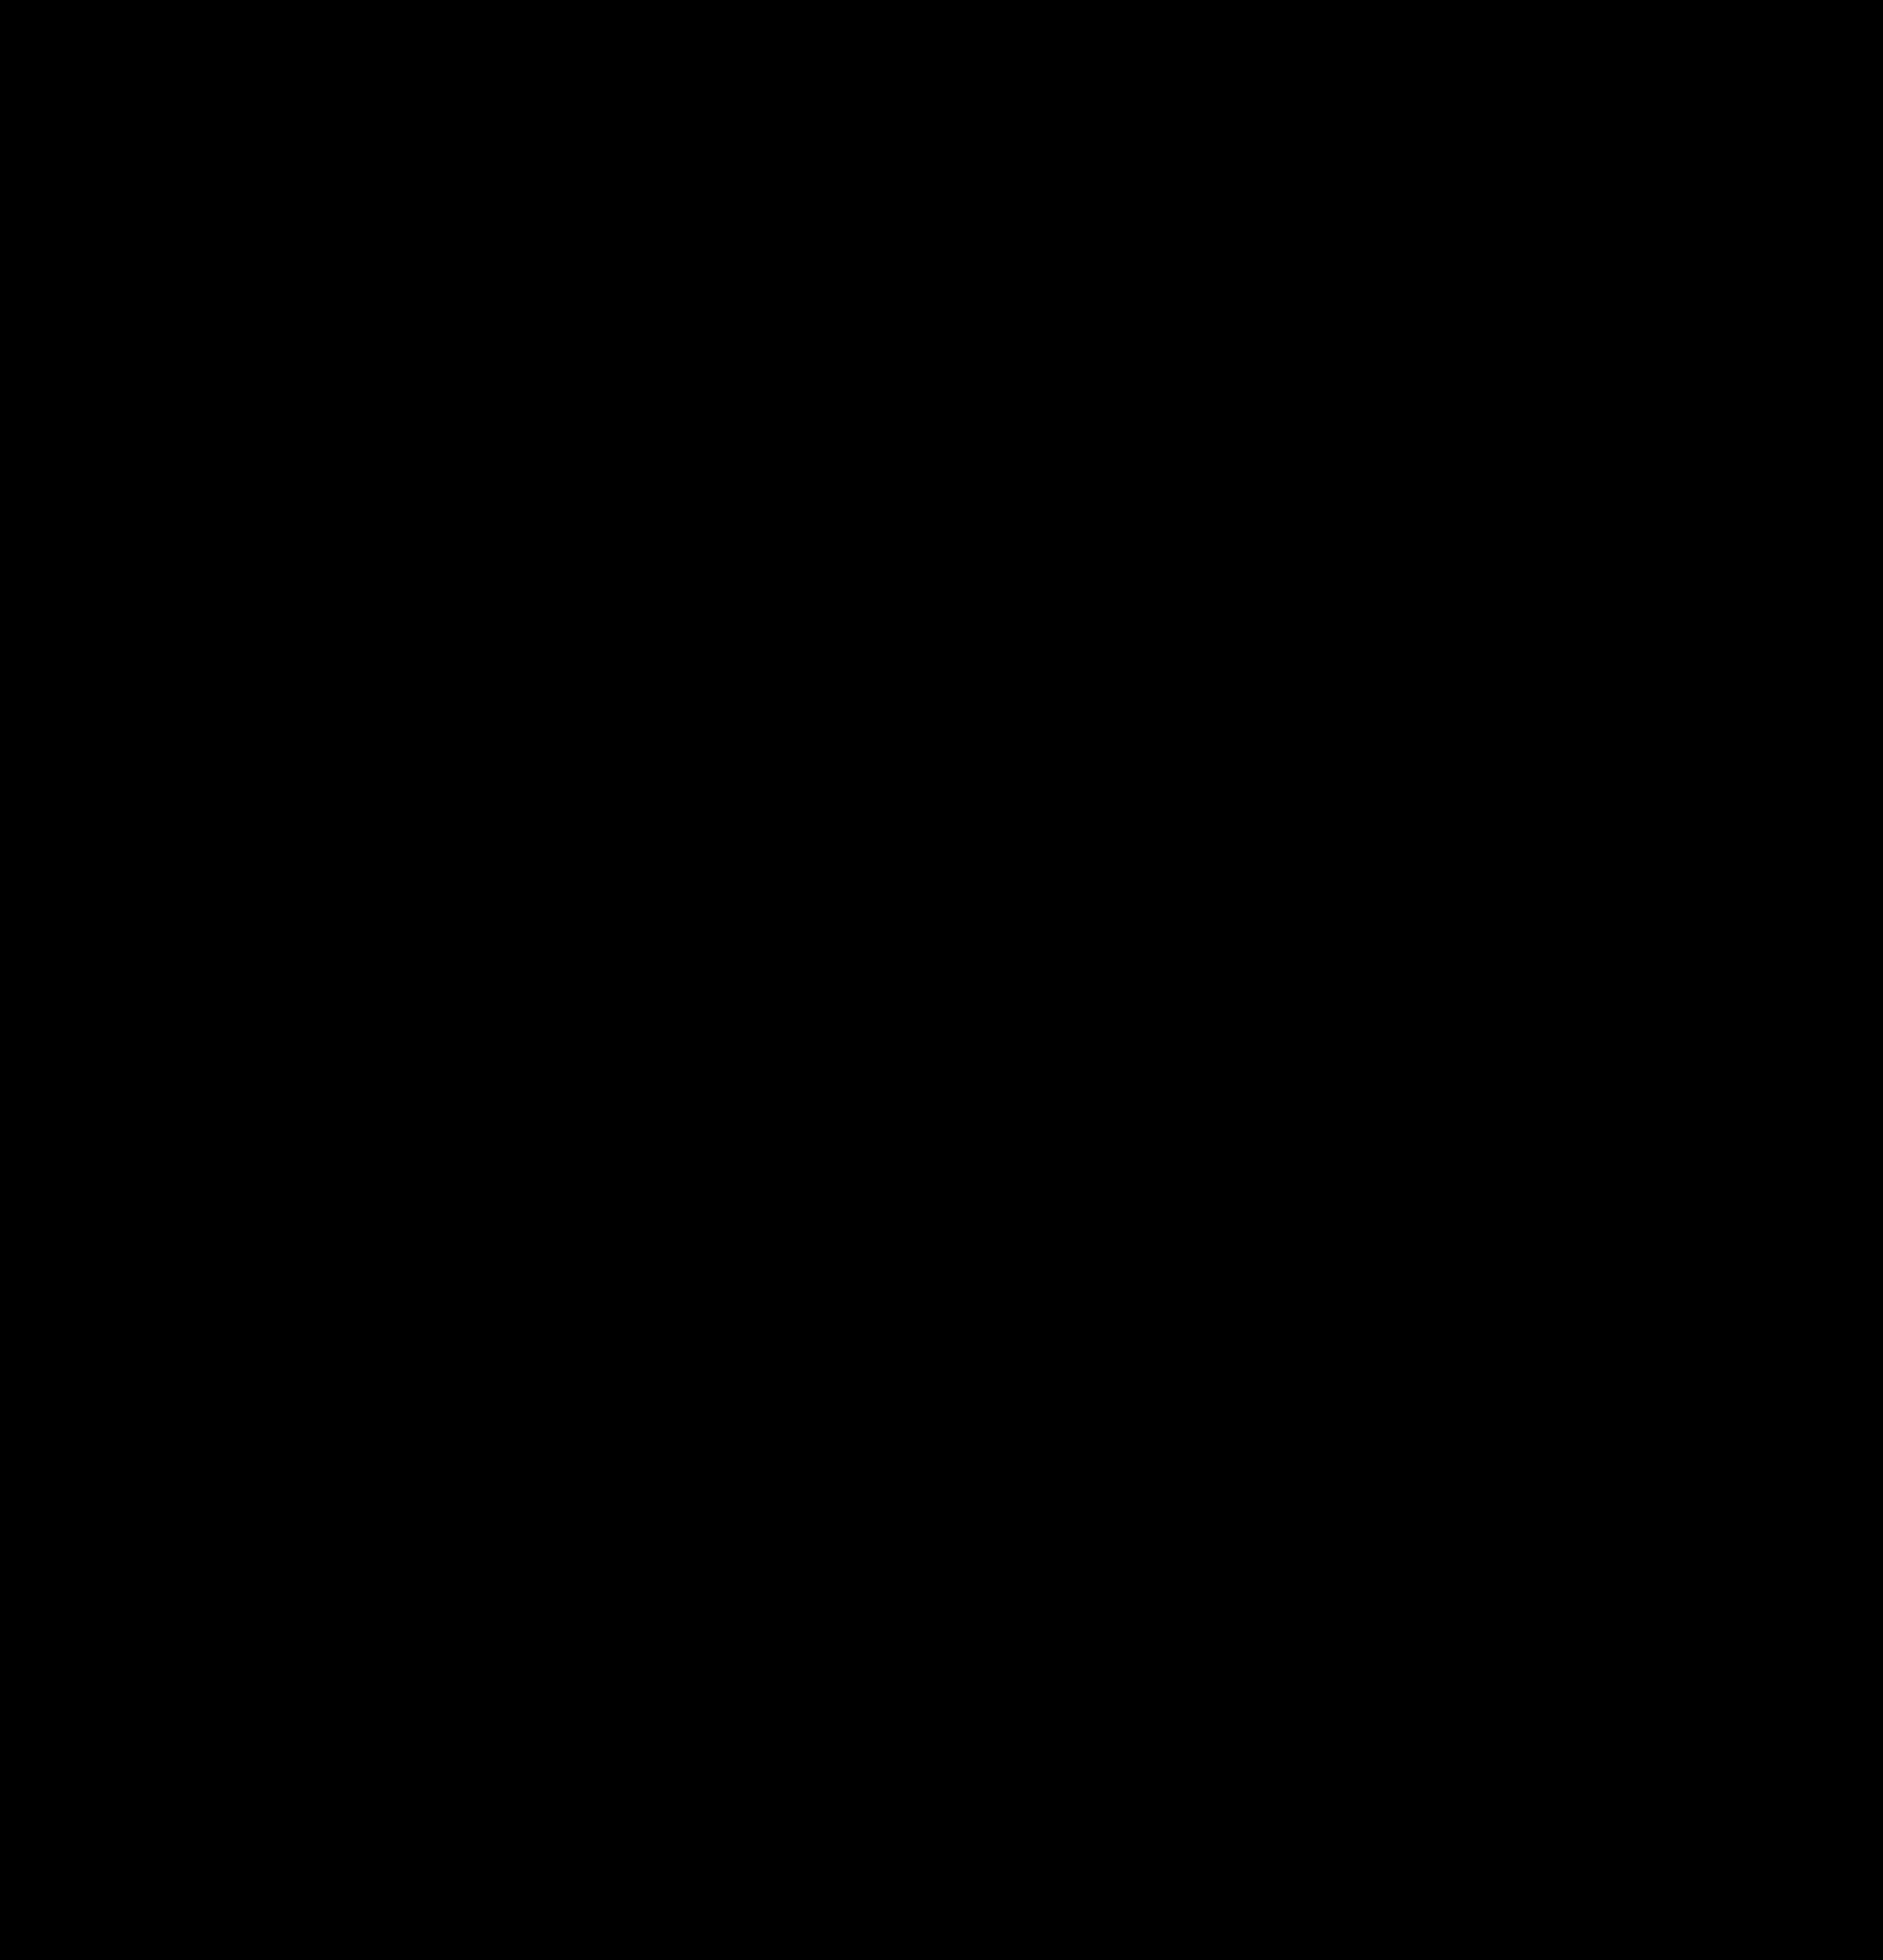

In [43]:
from sklearn.preprocessing import normalize

def mask_to_image(mask: np.ndarray):
    # shape = mask.shape
    
    out = np.zeros((mask.shape[1], mask.shape[2]), dtype=bool)

    print(out.shape)
    print(mask.shape)
    for i in range(mask.shape[1]):
        for j in range(mask.shape[2]):
            if mask[0,i,j] == 1:
                out[i,j] = 1

    # norm = np.linalg.norm(out)
    # out = out/norm  # normalized matrix
    out = (out * 255).astype(np.uint8)
    print(out)

    return Image.fromarray(out)

mask_to_image(mask.numpy())

In [12]:
import argparse
import logging
import os

import numpy as np
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

# from utils.data_loading import BasicDataset
# from unet import UNet
# from utils.utils import plot_img_and_mask

def predict_img(net,
                full_img,
                device,
                scale_factor=1,
                out_threshold=0.5):
    net.eval()
    img = torch.from_numpy(BasicDataset.preprocess(None, full_img, scale_factor, is_mask=False))
    img = img.unsqueeze(0)
    img = img.to(device=device, dtype=torch.float32)

    with torch.no_grad():
        output = net(img).cpu()
        output = F.interpolate(output, (full_img.size[1], full_img.size[0]), mode='bilinear')
        if net.n_classes > 1:
            mask = output.argmax(dim=1)
        else:
            mask = torch.sigmoid(output) > out_threshold

    return mask[0].long().squeeze().numpy()


def get_output_filenames(args):
    def _generate_name(fn):
        return f'{os.path.splitext(fn)[0]}_OUT.png'

    return args.output or list(map(_generate_name, args.input))


def mask_to_image(mask: np.ndarray, mask_values):
    if isinstance(mask_values[0], list):
        out = np.zeros((mask.shape[-2], mask.shape[-1], len(mask_values[0])), dtype=np.uint8)
    elif mask_values == [0, 1]:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=bool)
    else:
        out = np.zeros((mask.shape[-2], mask.shape[-1]), dtype=np.uint8)

    if mask.ndim == 3:
        mask = np.argmax(mask, axis=0)

    for i, v in enumerate(mask_values):
        out[mask == i] = v

    return Image.fromarray(out)


if __name__ == '__main__':
    args = get_args()
    logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

    in_files = args.input
    out_files = get_output_filenames(args)

    net = UNet(n_channels=3, n_classes=args.classes, bilinear=args.bilinear)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    logging.info(f'Loading model {args.model}')
    logging.info(f'Using device {device}')

    net.to(device=device)
    state_dict = torch.load(args.model, map_location=device)
    mask_values = state_dict.pop('mask_values', [0, 1])
    net.load_state_dict(state_dict)

    logging.info('Model loaded!')

    for i, filename in enumerate(in_files):
        logging.info(f'Predicting image {filename} ...')
        img = Image.open(filename)

        mask = predict_img(net=net,
                           full_img=img,
                           scale_factor=args.scale,
                           out_threshold=args.mask_threshold,
                           device=device)

        if not args.no_save:
            out_filename = out_files[i]
            result = mask_to_image(mask, mask_values)
            result.save(out_filename)
            logging.info(f'Mask saved to {out_filename}')

        if args.viz:
            logging.info(f'Visualizing results for image {filename}, close to continue...')
            plot_img_and_mask(img, mask)


NameError: name 'get_args' is not defined

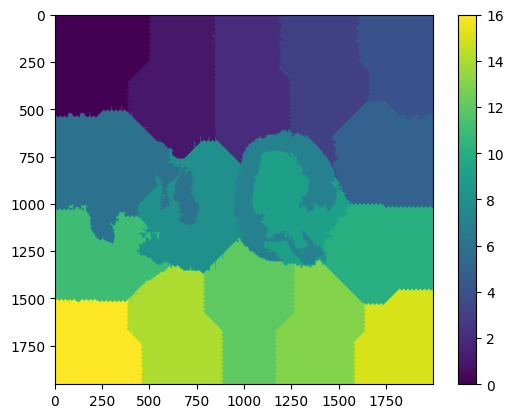

In [7]:
#SLIC

import numpy as np
from skimage.segmentation import slic
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Much faster than the standard class
from fast_slic.avx2 import SlicAvx2
from PIL import Image


with Image.open("data-images/tissue_hires_image.png") as f:
   image = np.array(f)
image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)   # You can convert the image to CIELAB space if you need.
slic = SlicAvx2(num_components=20, compactness=10)
assignment = slic.iterate(image) # Cluster Map
# print(assignment)
# print(slic.slic_model.clusters) # The cluster information of superpixels.
# segments = slic(image, n_segments=800, compactness=10)

# Visualize the superpixels
plt.imshow(assignment)
plt.colorbar()
plt.show()

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Calculate mean color for each superpixel
mean_colors = []
for label in np.unique(assignment):
    # mask = segments == label
    # mean_color = cv2.mean(lab_image, mask=mask)[:3]  # Calculate mean LAB color
    # mean_colors.append(mean_color)
    mask = assignment == label
    mean_color = np.mean(lab_image[mask], axis=0)
    mean_colors.append(mean_color)

# Convert mean_colors to RGB if needed
mean_colors_rgb = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_LAB2RGB)[0][0] for color in mean_colors]

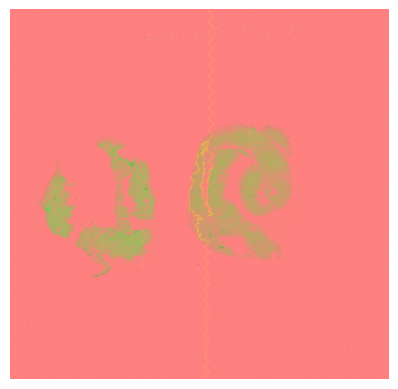

In [4]:
from skimage.segmentation import mark_boundaries

# Overlay superpixel boundaries on the original image
overlay = mark_boundaries(image, assignment)

# Display the overlay
plt.imshow(overlay)
plt.axis('off')
plt.show()

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the image
image_path = '/Users/serenapei/ASTAR/TissueClustering/data-images/tissue_hires_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Flatten the image into a 1D array
flat_image = image.flatten()

# Standardize the pixel values
scaler = StandardScaler()
flat_image_scaled = scaler.fit_transform(flat_image.reshape(-1, 1)).flatten()

In [9]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_transformed = pca.fit_transform(flat_image_scaled.reshape(1, -1))

# Print explained variance ratios
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))
print("PCA components shape:", pca_transformed.shape)


Explained variance ratios: [nan]
Total explained variance: nan
PCA components shape: (1, 1)


/Users/serenapei/ASTAR/he2visium_env/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:590: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


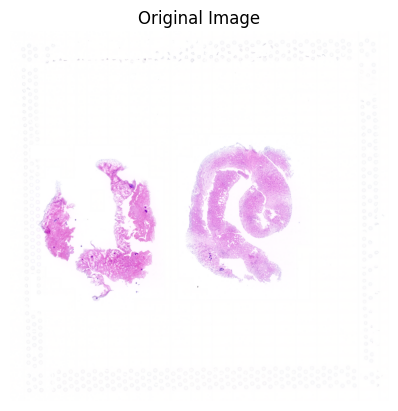

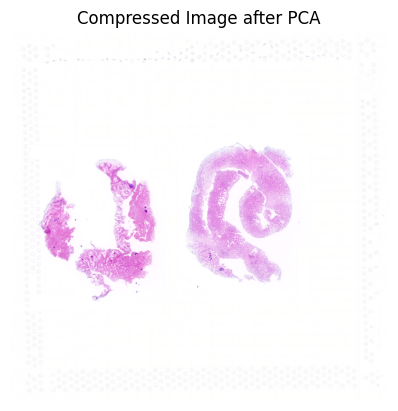

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the image
image_path = '/Users/serenapei/ASTAR/TissueClustering/data-images/tissue_hires_image.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Separate the color channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

def apply_pca(channel, n_components=0.50):
    # Flatten the channel
    flat_channel = channel.flatten().reshape(-1, 1)
    
    # Standardize the pixel values
    scaler = StandardScaler()
    flat_channel_scaled = scaler.fit_transform(flat_channel)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_transformed = pca.fit_transform(flat_channel_scaled)
    
    # Inverse transform to get the approximate channel back
    inverse_transformed = pca.inverse_transform(pca_transformed)
    
    # Reshape back to the original channel shape
    approx_channel = scaler.inverse_transform(inverse_transformed).reshape(channel.shape)
    
    return approx_channel

# Apply PCA to each channel
red_pca = apply_pca(red_channel)
green_pca = apply_pca(green_channel)
blue_pca = apply_pca(blue_channel)

# Stack the channels back to form the compressed image
compressed_image = np.stack((red_pca, green_pca, blue_pca), axis=2).astype(np.uint8)

# Display the compressed image
plt.imshow(compressed_image)
plt.title('Compressed Image after PCA')
plt.axis('off')
plt.show()


In [15]:
# Train LeNet5 on MNIST data
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the LeNet-5 model
def lenet5():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AveragePooling2D((2, 2)),
        layers.Conv2D(120, (5, 5), activation='tanh'),
        layers.Flatten(),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = lenet5()
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

# Save the model
model.save('lenet5_model.h5')

2024-06-10 16:25:37.841394: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/Users/serenapei/ASTAR/he2visium_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8148 - loss: 0.6474 - val_accuracy: 0.9625 - val_loss: 0.1347
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9524 - loss: 0.1537 - val_accuracy: 0.9752 - val_loss: 0.0843
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9726 - loss: 0.0922 - val_accuracy: 0.9822 - val_loss: 0.0672
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9786 - loss: 0.0702 - val_accuracy: 0.9818 - val_loss: 0.0626
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9844 - loss: 0.0528 - val_accuracy: 0.9843 - val_loss: 0.0557
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9880 - loss: 0.0401 - val_accuracy: 0.9878 - val_loss: 0.0425
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.9863 - val_loss: 0.0473
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9915 - loss: 0.0277 - 

Test Loss: 0.041536811739206314
Test Accuracy: 0.9869999885559082


In [2]:
# Apply PCA to MNIST dataset
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Convert the DataFrame to a NumPy array
X_array = X.values

# Reshape the NumPy array
X_reshaped = X_array.reshape(-1, 28, 28)

# Display the shape of the reshaped array
print("Shape after reshaping:", X_reshaped.shape)


Shape after reshaping: (70000, 28, 28)


In [3]:
# Apply PCA on MNIST data
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

print(y.shape)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)
print(X_scaled.shape)
X_pca = pca.fit_transform(X_scaled)

# Concatenate the PCA components with target labels into a single matrix
result_matrix = np.column_stack((X_pca, y))
print(result_matrix.shape)

(70000,)
(70000, 784)
(70000, 333)


In [4]:
print(result_matrix.shape)
print(result_matrix)

(70000, 333)
[[-0.89171985 -4.9297109  -0.09303758 ...  0.34914432 -0.75236794
   5.        ]
 [ 8.81353003 -7.51756046 -3.71418494 ... -0.31683963 -0.18031208
   0.        ]
 [ 2.20483541  9.82446089 -5.75248779 ... -0.57933675 -0.58560677
   4.        ]
 ...
 [-5.22259497 -1.18431579 -4.75472539 ...  0.1570488  -0.15444026
   4.        ]
 [-2.17772858 -6.99503251 -3.2287368  ... -0.38437844  0.31056431
   5.        ]
 [11.77787167 -5.40298122  2.32272519 ...  0.15354898  0.11826091
   6.        ]]


In [5]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Load images from file paths
def load_images(image_paths):
    images = []
    for path in image_paths:
        image = cv2.imread(path)  # Load image
        images.append(image)
    return images

# Step 2: Convert images to arrays
def images_to_arrays(images):
    return [np.array(image) for image in images]

# Step 3: Flatten image arrays
def flatten_images(image_arrays):
    return [image.flatten() for image in image_arrays]

# Example list of RGB image paths
# Replace this with your own list of RGB image paths
image_paths = ['/Users/serenapei/ASTAR/Y90HCC/NCC001Post_NCC011Post/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC012Post_NCC018Post/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC015Post_NCC012Post/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC015Post_NCC017Post/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC015Pre_NCC012Pre/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC016Post_NCC011Post/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC016Pre_NCC011Pre/outs/spatial/tissue_hires_image.png', 
         '/Users/serenapei/ASTAR/Y90HCC/NCC023Pre_NCC034Pre/outs/spatial/tissue_hires_image.png',
         '/Users/serenapei/ASTAR/Y90HCC/NCC027Post/outs/spatial/tissue_hires_image.png',
        '/Users/serenapei/ASTAR/Y90HCC/NCC027Pre_NCC040A2Pre/outs/spatial/tissue_hires_image.png',
        '/Users/serenapei/ASTAR/Y90HCC/NCC037Post_NCC023Post/outs/spatial/tissue_hires_image.png',
        '/Users/serenapei/ASTAR/Y90HCC/NCC037Pre_NCC040A1Pre/outs/spatial/tissue_hires_image.png',
        '/Users/serenapei/ASTAR/Y90HCC/NCC039Post_NCC034Post/outs/spatial/tissue_hires_image.png',
        '/Users/serenapei/ASTAR/Y90HCC/NCC040Post/outs/spatial/tissue_hires_image.png']

# Step 1: Load images from file paths
images = load_images(image_paths)

# Step 2: Convert images to arrays
image_arrays = images_to_arrays(images)
print(len(image_arrays[0]))

# Step 3: Flatten image arrays
flattened_images = flatten_images(image_arrays)

2000


In [10]:
# Apply PCA to H&E data
import numpy as np

# Example vectors of different dimensions
vectors = flattened_images

# Step 1: Determine the maximum length
max_length = max(len(vec) for vec in vectors)

# Step 2: Create a matrix with zeros
matrix = np.zeros((len(vectors), max_length), dtype=int)

# Step 3: Pad zeros to the right of each vector
for i, vec in enumerate(vectors):
    matrix[i, :len(vec)] = vec

# Step 4: Output the final matrix
print("Final Matrix:")
print(matrix.shape)

# Standardize the features
scaler = StandardScaler()
m_scaled = scaler.fit_transform(matrix)
print(m_scaled.shape)

# Apply PCA
pca2 = PCA(n_components=14)
data_pca = pca2.fit_transform(m_scaled)


print(data_pca.shape)
print(data_pca)

# Step 4: Optionally, transform the reduced data back to its original space
# This step is optional and might not be needed depending on your task

# Step 5: Reshape the transformed data to your desired target shape
# target_shape = (333,-1)  # Example target shape
# data_pca_reshaped = data_pca.reshape(*target_shape)


Final Matrix:
(14, 11934000)
(14, 11934000)


KeyboardInterrupt: 

In [11]:
print(data_pca.shape)
print(data_pca)

(14, 14)
[[ 1.25963706e+03  6.81170891e+02  2.61531436e+02  5.85756788e+02
   3.36991299e+02 -2.34187709e+02  7.18098525e+02  4.58093150e+02
   1.39689345e+03  1.21555977e+03  1.44812713e+03  1.65486805e+01
   3.96716538e+01 -4.18956164e-10]
 [ 1.20686450e+03  6.81845165e+02  3.97840234e+02  4.93697713e+02
   2.50146167e+02 -1.27022323e+02  5.61840482e+02  2.11751120e+02
   2.82345970e+02 -1.59804797e+02 -1.18186200e+03  1.50332662e+03
   7.53964353e+02 -4.18956164e-10]
 [ 2.95116789e+02  7.92722740e+02 -7.14772783e+01 -1.19221305e+02
  -4.20146983e+02  4.54468522e+02 -9.55135577e+02 -2.62525613e+03
   3.38605039e+02 -7.30116403e+00  2.15759706e+02  3.02577074e+01
   1.51026840e+02 -4.18956164e-10]
 [ 9.23098847e+02  6.82444946e+02  3.91594913e+02  5.29075803e+02
   1.65172776e+02  6.47882875e+01  2.86743973e+02 -4.32548700e+01
   2.20250387e+02 -1.29594729e+02 -7.98406259e+02  1.16953399e+02
  -1.57496234e+03 -4.18956164e-10]
 [ 5.38637021e+02  9.20978896e+02 -4.56224494e+01 -6.499859

In [ ]:
# Calculate M*
M = np.matmul(result_matrix,data_pca.T)
print(M.shape)

In [ ]:
# Apply LeNet-5
preds = model.predict(np.matmul(result_matrix,M))

In [32]:
# Graph Cut
from skimage.util import img_as_float
from skimage import io, color
from skimage import draw
import matplotlib.pyplot as plt
import argparse, time
import math, copy
import numpy as np
import scipy.io
import cv2
from sklearn import mixture
from PIL import Image, ImageDraw
# from google.colab import patches
# from google.colab.patches import cv2_imshow
import os
import timeit
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    # img = mpimg.imread(image_path)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=np.bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

# Get a normalized version of the given histograms (divide by sum)
def normalize_histograms(histograms):
  return np.float32([h / h.sum() for h in histograms])

def mask_for_fg(img, img_mask):
  fg_image = np.zeros_like(img)
  fg_image[img_mask] = img[img_mask]
  return fg_image

def mask_for_bg(img, img_mask):
  bg_image = np.zeros_like(img)
  bg_image[~img_mask] = img[~img_mask]
  return bg_image


def visualize_likelihood_map(gmm_bg, gmm_fg, img):
  original_image = copy.deepcopy(img)
  print( " Orginal Image Shape : ",img.shape)
  original_image = original_image.reshape((-1,3))
  print( " Orginal Image Shape after reshapping : ",original_image.shape)
  log_likelihood_fg = gmm_fg.score_samples(original_image)
  log_likelihood_bg = gmm_bg.score_samples(original_image)

  log_likelihood_fg = log_likelihood_fg.reshape(img.shape[0],img.shape[1]) 
  log_likelihood_bg = log_likelihood_bg.reshape(img.shape[0],img.shape[1]) 
  print("log_likelihood_bg SHAPE :  ", log_likelihood_bg.shape)

  return log_likelihood_fg, log_likelihood_bg

def gaussian_model(img):
  print("Original Image Shape : ", img.shape)
  new_img = img.reshape((-1,3))
  print("New Image Shape : ", new_img.shape)
  gmm_model = mixture.GaussianMixture(n_components= 2,covariance_type="tied").fit(new_img)
  gmm_labels = gmm_model.predict(new_img)

  segmented_image = gmm_labels.reshape(img.shape[0],img.shape[1])
  segmented_image = segmented_image * 255
  print("New Image Shape : ", segmented_image.shape)
  print(segmented_image)
  # show_image(segmented_image)
  return gmm_model, gmm_labels

def run_grabcut(img, bbox, itercount):
  bgdModel = np.zeros((1,65),np.float64)
  fgdModel = np.zeros((1,65),np.float64)

  grabcut_mask = np.zeros(img.shape[:2],np.uint8)
  cv2.grabCut(img,grabcut_mask,bbox,bgdModel,fgdModel,itercount,cv2.GC_INIT_WITH_RECT)
  mask2 = np.where((grabcut_mask==2)|(grabcut_mask==0),0,1).astype('uint8')
  img = img*mask2[:,:,np.newaxis]
  show_image(img)
  return None


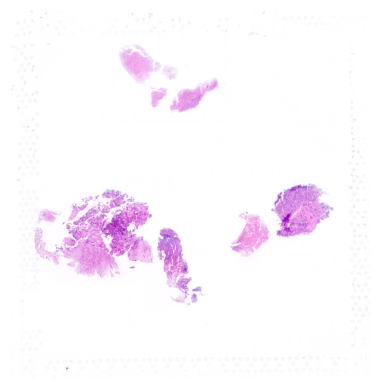

In [33]:
def read_image(img_path):
    # Read the image from the file path
    img = Image.open(img_path)

    # Display the image using Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# read image
img_name = 'test'
img_path = '/Users/serenapei/ASTAR/Y90HCC/NCC001Post_NCC011Post/outs/spatial/tissue_hires_image.png'
read_image(img_path)
img = Image.open(img_path)

# # read image_mask
# poly = scipy.io.loadmat('/content/Part2_GraphCut/cat_poly.mat')['poly']
# img_mask = poly2mask(poly[:,1], poly[:,0], (img.shape[0],img.shape[1]))

# show_image(img)
# show_image(img_mask)

In [34]:
file_map = {'NCC001Post_NCC011Post': ['HCC Y90 GEX 20211122 Frame A.czi_Tumor_(4.00,400,1360,34816,31616)-mask.png','HCC Y90 GEX 20211122 Frame A.czi_Stroma_(4.00,2976,2672,32000,30656)-mask.png'],
            'NCC012Post_NCC018Post': ['HCC Y90 GEX 20211122 Frame B.czi_Tumor_(4.00,2960,2760,24672,23656)-mask.png', 'HCC Y90 GEX 20211122 Frame B.czi_Stroma_(4.00,3088,11360,24528,14952)-mask.png'],
            'NCC015Post_NCC017Post': ['HCC Y90 GEX 20211122 Frame C.czi_Tumor_(4.00,5544,11944,23896,14616)-mask.png','HCC Y90 GEX 20211122 Frame C.czi_Stroma_(4.00,5400,2584,31264,24360)-mask.png'],
            'NCC039Post_NCC034Post': ['HCC Y90 GEX 20211122 Frame D.czi_Tumor_(4.00,328,144,34728,34720)-mask.png','HCC Y90 GEX 20211122 Frame D.czi_Stroma_(4.00,2576,1424,32360,25864)-mask.png'],
            'NCC027Post': ['HCC Y90 GEX 20221206 Frame A.czi_Tumor_(4.00,0,24,30008,35368)-mask.png','HCC Y90 GEX 20221206 Frame A.czi_Stroma_(4.00,0,0,35640,35256)-mask.png'],
            'NCC040Post': ['HCC Y90 GEX 20221206 Frame B.czi_Tumor_(4.00,960,720,34872,33784)-mask.png','HCC Y90 GEX 20221206 Frame B.czi_Stroma_(4.00,960,664,34872,33864)-mask.png'],
            'NCC037Post_NCC023Post': ['HCC Y90 GEX 20221206 Frame C.czi_Tumor_(4.00,232,976,35576,33912)-mask.png','HCC Y90 GEX 20221206 Frame C.czi_Stroma_(4.00,1144,648,34200,33888)-mask.png'],
            'NCC037Pre_NCC040A1Pre': ['HCC Y90 GEX 20221214 Frame A.czi_Tumor_(4.00,1547,3452,23802,17219)-mask.png','HCC Y90 GEX 20221214 Frame A.czi_Stroma_(4.00,1565,3470,23556,21574)-mask.png'],
            'NCC023Pre_NCC034Pre': ['HCC Y90 GEX 20221214 Frame B.czi_Tumor_(4.00,0,0,26387,22060)-mask.png','HCC Y90 GEX 20221214 Frame B.czi_Stroma_(4.00,1365,17,20361,22008)-mask.png','HCC Y90 GEX 20221214 Frame B.czi_Epithelium_(4.00,0,0,26404,22072)-mask.png'],
            'NCC027Pre_NCC040A2Pre': ['HCC Y90 GEX 20221214 Frame C.czi_Tumor_(4.00,4461,2110,18907,22037)-mask.png','HCC Y90 GEX 20221214 Frame C.czi_Stroma_(4.00,4472,375,21159,24277)-mask.png','HCC Y90 GEX 20221214 Frame C.czi_Epithelium_(4.00,4478,2122,18831,22025)-mask.png'],
            'NCC015Post_NCC012Post': ['V11N0-086_H&E_Frame B.czi_Tumor_(4.00,5504,2704,40920,41664)-mask.png','V11N0-086_H&E_Frame B.czi_Stroma_(4.00,1112,176,45360,44432)-mask.png'],
            'NCC015Pre_NCC012Pre': ['V11N0-086_H&E_Whole Slide.czi - Scene #1_Tumor_(4.00,456,104,42536,45856)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #1_Stroma_(4.00,640,0,45840,46056)-mask.png'],
            'NCC016Pre_NCC011Pre': ['V11N0-086_H&E_Whole Slide.czi - Scene #3_Tumor_(4.00,1040,336,42456,43112)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #3_Stroma_(4.00,1064,352,46432,44448)-mask.png'],
            'NCC016Post_NCC011Post': ['V11N0-086_H&E_Whole Slide.czi - Scene #4_Tumor_(4.00,1360,560,44960,45352)-mask.png','V11N0-086_H&E_Whole Slide.czi - Scene #4_Stroma_(4.00,0,2352,46480,44480)-mask.png']}

img_mask = Image.open('/Users/serenapei/ASTAR/Y90HCC/Qupath by pathologist B/20230316 first 12 Visium spls/masks/HCC Y90 GEX 20211122 Frame A.czi_necrosis_(4.00,19438,26153,3625,3840)-mask.png')

fg_image = mask_for_fg(np.array(img), np.array(img_mask))
gmm_fg, fg_gmm_labels = gaussian_model(fg_image)

Original Image Shape :  (2000, 1954, 3)
New Image Shape :  (3908000, 3)
New Image Shape :  (2000, 1954)
[[255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


[[255 255 255 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


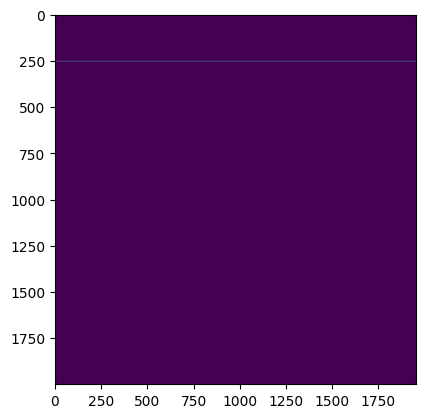

In [39]:
fg_gmm_labels = (fg_gmm_labels*255).reshape((2000,1954))
print(fg_gmm_labels)
plt.imshow(fg_gmm_labels)

In [ ]:
bg_image = mask_for_bg(img, img_mask)
gmm_bg, bg_gmm_labels = gaussian_model(bg_image)

In [ ]:
fg,bg = visualize_likelihood_map(gmm_bg, gmm_fg, img)
print(" Foreground ")
show_image(fg)
print(" Background ")
show_image(bg)

In [1]:
# CV GrabCut
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/Users/serenapei/ASTAR/Y90HCC/NCC012Post_NCC018Post/outs/spatial/tissue_hires_image.png')
assert img is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img.shape[:2],np.uint8)
print(img.shape)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)0
rect = (50,50,1500,1600)
# cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
(mask, bgModel, fgModel) = cv.grabCut(img, mask, rect, bgdModel,
	fgdModel, 5, mode=cv.GC_INIT_WITH_RECT)

# mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# img = img*mask2[:,:,np.newaxis]
# print(img)
# plt.imshow(img),plt.colorbar(),plt.show()

# values = (
# 	("Definite Background", cv2.GC_BGD),
# 	("Probable Background", cv2.GC_PR_BGD),
# 	("Definite Foreground", cv2.GC_FGD),
# 	("Probable Foreground", cv2.GC_PR_FGD),
# )
# # loop over the possible GrabCut mask values
# for (name, value) in values:
# 	# construct a mask that for the current value
# 	print("[INFO] showing mask for '{}'".format(name))
# 	valueMask = (mask == value).astype("uint8") * 255
# 	# display the mask so we can visualize it
# 	cv2.imshow(name, valueMask)
# 	cv2.waitKey(0)
	
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),
	0, 1)
# scale the mask from the range [0, 1] to [0, 255]
outputMask = (outputMask * 255).astype("uint8")
# apply a bitwise AND to the image using our mask generated by
# GrabCut to generate our final output image
output = cv.bitwise_and(img, img, mask=outputMask)

cv.imshow("Input", img)
cv.imshow("GrabCut Mask", outputMask)
cv.imshow("GrabCut Output", output)


(1955, 2000, 3)


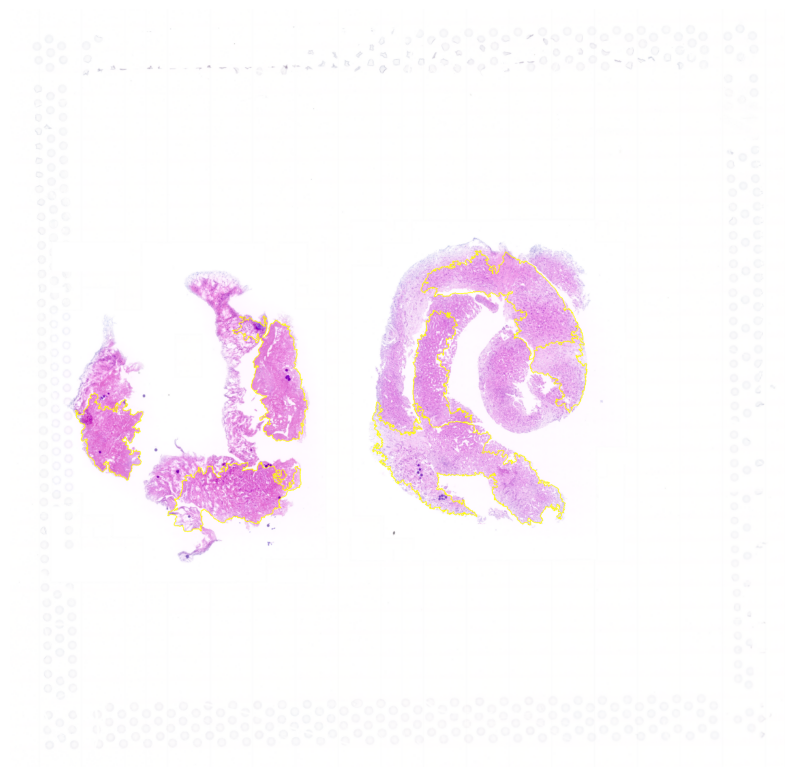

In [2]:
# Improved SLIC

import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2lab
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def segment_and_merge(image_path, n_segments=250, compactness=10, similarity_threshold=30):
    # Load image
    image = imread(image_path)
    image_lab = rgb2lab(image)

    # Apply SLIC segmentation
    segments = slic(image, n_segments=n_segments, compactness=compactness, start_label=1)

    # Calculate mean color for each segment
    unique_segments = np.unique(segments)
    mean_colors = np.zeros((len(unique_segments), 3))

    for i, segment_val in enumerate(unique_segments):
        mask = segments == segment_val
        mean_colors[i, :] = image_lab[mask].mean(axis=0)

    # Compute pairwise distances between segment colors
    distances = cdist(mean_colors, mean_colors)

    # Create a new label array
    new_labels = segments.copy()

    # Merge segments with similar color
    for i in range(len(unique_segments)):
        for j in range(i + 1, len(unique_segments)):
            if distances[i, j] < similarity_threshold:
                new_labels[new_labels == unique_segments[j]] = unique_segments[i]

    return new_labels

def visualize_segments(image_path, segments):
    # Load image
    image = imread(image_path)

    # Display the segmented image
    plt.figure(figsize=(10, 10))
    plt.imshow(mark_boundaries(image, segments))
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/Users/serenapei/ASTAR/Y90HCC/NCC012Post_NCC018Post/outs/spatial/tissue_hires_image.png'
segments = segment_and_merge(image_path)
visualize_segments(image_path, segments)


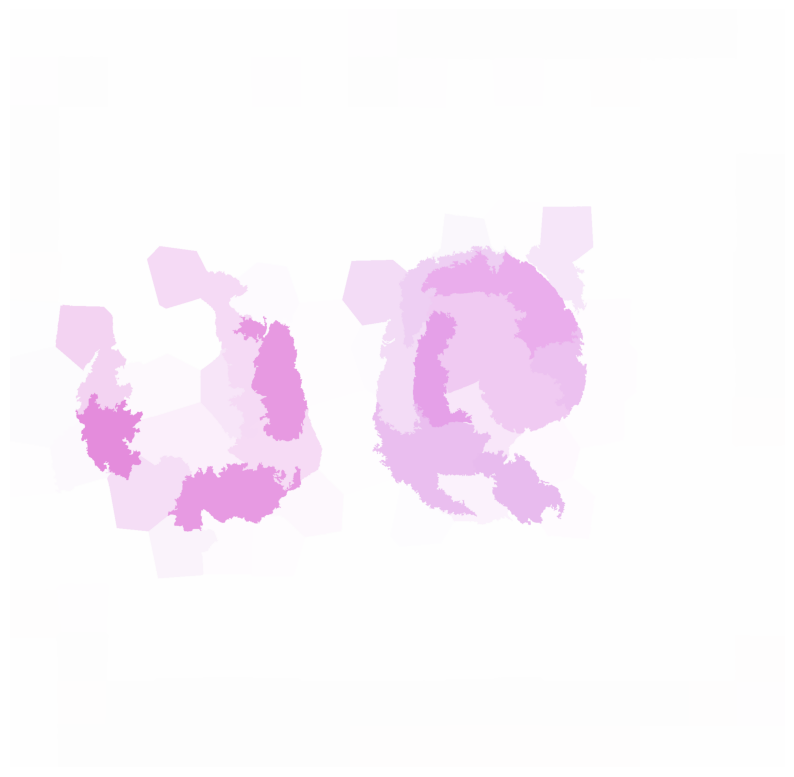

In [8]:
# MODIFIED SLIC
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2lab, label2rgb
from skimage.io import imread
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def segment_and_merge(image_path, n_segments=250, compactness=10, color_weight=1.0, spatial_weight=1.0, similarity_threshold=30):
    # Load image
    image = imread(image_path)
    image_lab = rgb2lab(image)

    # Apply SLIC segmentation
    segments = slic(image, n_segments=n_segments, compactness=compactness, start_label=1)

    # Calculate mean color and centroid for each segment
    regions = regionprops(segments)
    mean_colors = np.zeros((len(regions), 3))
    centroids = np.zeros((len(regions), 2))

    for i, region in enumerate(regions):
        coords = region.coords
        mean_colors[i, :] = image_lab[coords[:, 0], coords[:, 1]].mean(axis=0)
        centroids[i, :] = region.centroid

    # Compute pairwise distances between segment colors and centroids
    color_distances = cdist(mean_colors, mean_colors)
    spatial_distances = cdist(centroids, centroids)

    # Combine color and spatial distances
    combined_distances = color_weight * color_distances + spatial_weight * spatial_distances

    # Create a new label array
    new_labels = segments.copy()

    # Merge segments based on combined distances
    unique_segments = np.unique(segments)
    for i in range(len(unique_segments)):
        for j in range(i + 1, len(unique_segments)):
            if combined_distances[i, j] < similarity_threshold:
                new_labels[new_labels == unique_segments[j]] = unique_segments[i]

    return new_labels

def color_segments_differently(image_path, segments):
    # Load image
    image = imread(image_path)
    
    # Assign random colors to each segment
    colored_image = label2rgb(segments, image, kind='avg')

    return colored_image

def visualize_segments(image_path, segments):
    colored_image = color_segments_differently(image_path, segments)

    # Display the segmented image with different colors
    plt.figure(figsize=(10, 10))
    plt.imshow(colored_image)
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/Users/serenapei/ASTAR/Y90HCC/NCC012Post_NCC018Post/outs/spatial/tissue_hires_image.png'
segments = segment_and_merge(image_path)
visualize_segments(image_path, segments)


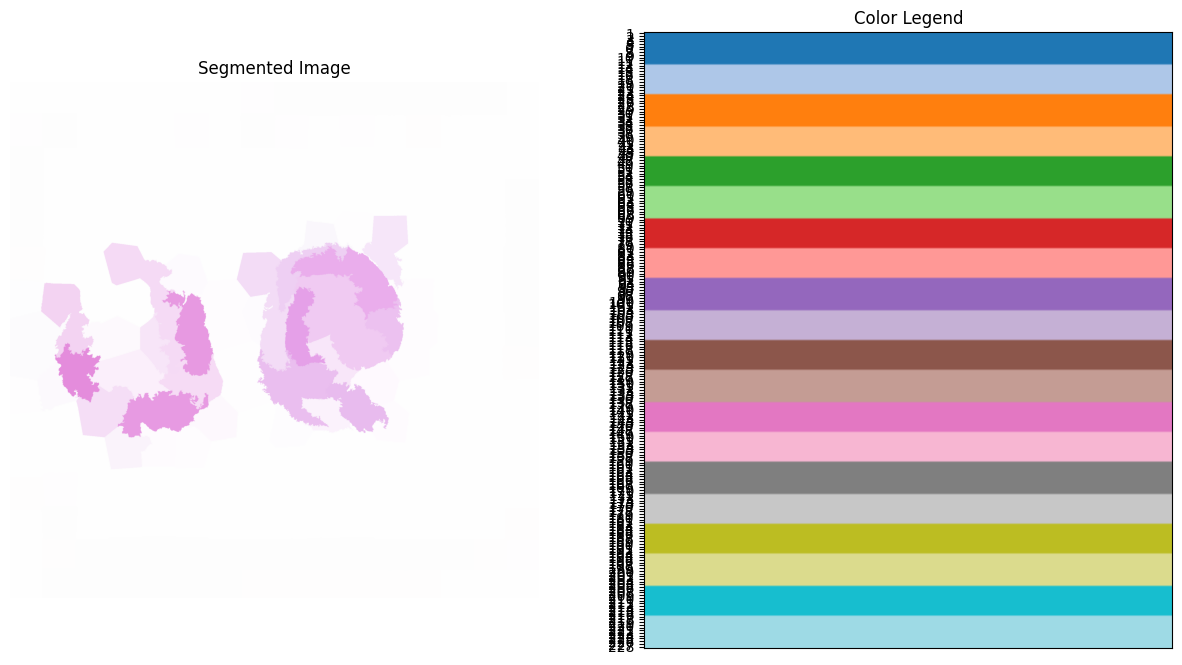

In [11]:
import numpy as np
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.io import imread
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def segment_and_merge(image_path, n_segments=250, compactness=10):
    # Load image
    image = imread(image_path)
    
    # Apply SLIC segmentation
    segments = slic(image, n_segments=n_segments, compactness=compactness, start_label=1)
    
    return segments

def color_segments_differently(image_path, segments):
    # Load image
    image = imread(image_path)
    
    # Assign random colors to each segment
    colored_image = label2rgb(segments, image, kind='avg')
    
    return colored_image

def visualize_segments_with_legend(image_path, segments):
    unique_segments = np.unique(segments)
    num_segments = len(unique_segments)

    # Create colormap for legend
    cmap = plt.get_cmap('tab20', num_segments)

    # Create legend image
    legend_image = np.zeros((num_segments, 50, 3), dtype=np.uint8)
    for i, label in enumerate(unique_segments):
        color = (255 * np.array(cmap(i)[:3])).astype(np.uint8)
        legend_image[i, :, :] = color

    # Load image
    image = imread(image_path)

    # Color segments
    colored_image = color_segments_differently(image_path, segments)

    # Display the segmented image with legend
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    axes[0].imshow(colored_image)
    axes[0].axis('off')
    axes[0].set_title('Segmented Image')
    axes[1].imshow(legend_image, aspect='auto')
    axes[1].set_yticks(np.arange(num_segments))
    axes[1].set_yticklabels(unique_segments)
    axes[1].set_xticks([])
    axes[1].set_xticklabels([])
    axes[1].set_title('Color Legend')
    plt.show()

# Example usage
image_path = '/Users/serenapei/ASTAR/Y90HCC/NCC012Post_NCC018Post/outs/spatial/tissue_hires_image.png'
segments = segment_and_merge(image_path)
visualize_segments_with_legend(image_path, segments)
